In [135]:
import numpy as np
from scipy.interpolate import interp1d

In [136]:
def PP_load(outfile):
    '''Reads CASTEP-like recpot PP file
    Returns tuple (g, v)'''
    HARTREE2EV = 27.2113845
    BOHR2ANG   = 0.529177211
    with open(outfile,'r') as outfil:
        lines = outfil.readlines()
        
    for i in range(0,len(lines)):
        line = lines[i]
        if 'END COMMENT' in line:
            ibegin = i+3
        if '  1000' in line:
            iend = i
    line = " ".join([line.strip() for line in lines[ibegin:iend]])
    
    if '1000' in lines[iend]:
        print('Recpot pseudopotential ' +outfile+ ' loaded')
    else:
        return Exception
    gmax = np.float(lines[ibegin-1].strip())*BOHR2ANG
    g = np.linspace(0,gmax,num=npoints)
    v = np.array(line.split()).astype(np.float)/HARTREE2EV/BOHR2ANG**3
    return g, v
    

In [137]:
g_PP, v_PP = PP_load('./Al_lda.oe01.recpot')

Recpot pseudopotential ./Al_lda.oe01.recpot loaded


In [138]:
def PP_interpolation(g_PP,v_PP,order=None):
    '''Interpolates recpot PP
    Returns interpolation function
    Linear interpolation is the default. 
    However, it can use 2nd and 3rd order interpolation
    by specifying order=n, n=1-3 in argument list.'''
    if order is None:
        order = 1
    v = interp1d(g_PP,v_PP,kind=order)
    return v

In [139]:
v = PP_interpolation(g_PP=g_PP,v_PP=v_PP)

In [140]:
import matplotlib.pyplot as plt

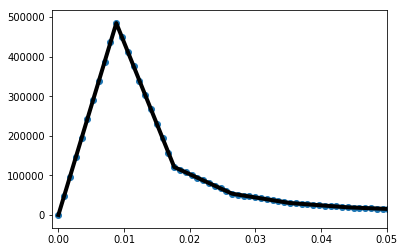

In [141]:
plt.plot(g_PP,(np.abs(v_PP)),linewidth=4,color='black')
plt.scatter(x,(np.abs(v(x))))
plt.xlim(-0.001,0.05)
plt.show()